# Análise e exploração de dados

Este ficheiro é para me "ambientar" com o que é pedido.
O "trabalho" oficial está no reposítório **git** da equipa: 
https://bitbucket.org/anadi-rita/anadi/src/main/

~~~bash
git clone git@bitbucket.org:anadi-rita/anadi.git
~~~

## Imports

In [15]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import utilidades as ut

## Variáveis

In [16]:
proj_root_dir = Path(".").resolve().parent.parent
data_files_dir = "/ficheiros/Trabalho 1/"
ficheiro_dados_co = f"{proj_root_dir}{data_files_dir}CO_data.csv"
ficheiro_dicio_dados_co = f"{proj_root_dir}{data_files_dir}CO_data_dicionario.xlsx"

colunas_em_estudo = ["year", "country", "coal_co2", "population"]
paises = ["United States", "China", "India", "European Union (27) (GCP)", "Russia"]

# Preparar uma lista de cores
cores = list(mcolors.BASE_COLORS.keys())


## Carregar os dados

In [17]:
dados_co = pd.read_csv(
    ficheiro_dados_co,
    delimiter=",",
    header=0,
)

### Espreitar os dados

In [18]:
dados_co.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Carregar o dicionário

In [19]:
dicionario_dados = pd.read_excel(ficheiro_dicio_dados_co)

## Análise e exploração de dados

Ponto 4.1 do trabalho

### Ponto 4
Construa um gráfico que permita comparar as emissões de CO2 originadas pelo carvão dos Estados
Unidos, China, Índia, União Europeia (a 27) e a Rússia no período 2000-2021. 


#### Extrair os dados dos areas pretendidas

In [20]:
dados_co_areas = dados_co.loc[dados_co.country.isin(paises), colunas_em_estudo]

### Solução Rita

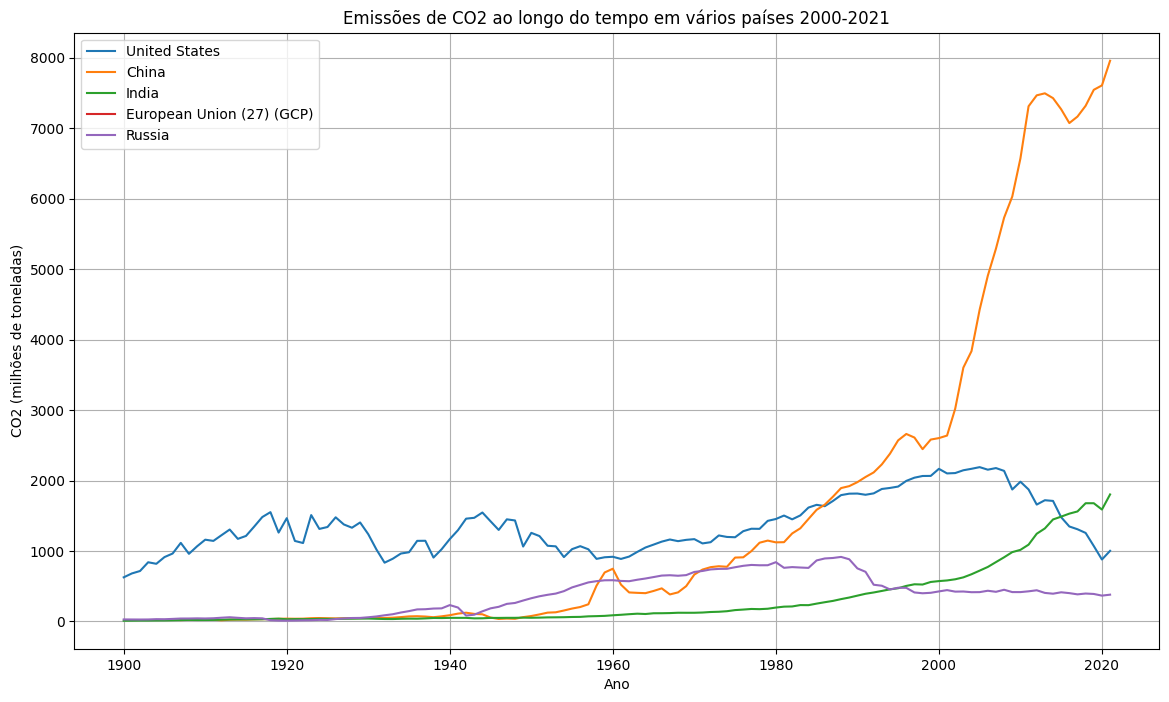

In [21]:
# gráfico pedido pelo professor(time series)
plt.figure(figsize=(14, 8))
#para cada país filtra os dados(usado para a label) e apresenta
for country in paises:
    # Filtra os dados para o país atual
    country_co2 = dados_co_areas[dados_co_areas['country'] == country]
    # Plota os dados para o país atual
    plt.plot(country_co2['year'], country_co2['coal_co2'], label=country)
plt.xlabel('Ano')
plt.ylabel('CO2 (milhões de toneladas)')
plt.title('Emissões de CO2 ao longo do tempo em vários países 2000-2021')
plt.legend()
plt.grid(True)
plt.show()